In [1]:
# importing the required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import lime
import lime.lime_tabular
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
data=pd.read_csv("../data/data_regression.csv")
df=data.copy()
df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [3]:
df.shape

(2000, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   customer_id             2000 non-null   int64  
 2   phone_no                2000 non-null   object 
 3   gender                  1976 non-null   object 
 4   age                     2000 non-null   int64  
 5   no_of_days_subscribed   2000 non-null   int64  
 6   multi_screen            2000 non-null   object 
 7   mail_subscribed         2000 non-null   object 
 8   weekly_mins_watched     2000 non-null   float64
 9   minimum_daily_mins      2000 non-null   float64
 10  maximum_daily_mins      2000 non-null   float64
 11  weekly_max_night_mins   2000 non-null   int64  
 12  videos_watched          2000 non-null   int64  
 13  maximum_days_inactive   1972 non-null   float64
 14  customer_support_calls  2000 non-null   

In [5]:
#df=df.dropna()

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,2000.0,2015.000000,0.000000,2015.0,2015.0000,2015.000,2015.0000,2015.00
customer_id,2000.0,554887.157500,261033.690318,100198.0,328634.7500,567957.500,773280.2500,999961.00
age,2000.0,38.690500,10.206410,18.0,32.0000,37.000,44.0000,82.00
no_of_days_subscribed,2000.0,99.750000,39.755386,1.0,73.0000,99.000,127.0000,243.00
weekly_mins_watched,2000.0,270.178425,80.551627,0.0,218.2125,269.925,324.6750,526.20
minimum_daily_mins,2000.0,10.198700,2.785519,0.0,8.4000,10.200,12.0000,20.00
maximum_daily_mins,2000.0,30.620780,9.129165,0.0,24.7350,30.590,36.7975,59.64
weekly_max_night_mins,2000.0,100.415500,19.529454,42.0,87.0000,101.000,114.0000,175.00
videos_watched,2000.0,4.482500,2.487728,0.0,3.0000,4.000,6.0000,19.00
maximum_days_inactive,1972.0,3.250507,0.809084,0.0,3.0000,3.000,4.0000,6.00


customer_id ,year ve phone_no ,
ml modelm eğitimimizde yeterli bilgiyi sağlamayacağından dolayı ddroplamak güzel bir çözüm

In [7]:
dropped_columns = ["year","customer_id","phone_no"]
df.drop(dropped_columns, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  1976 non-null   object 
 1   age                     2000 non-null   int64  
 2   no_of_days_subscribed   2000 non-null   int64  
 3   multi_screen            2000 non-null   object 
 4   mail_subscribed         2000 non-null   object 
 5   weekly_mins_watched     2000 non-null   float64
 6   minimum_daily_mins      2000 non-null   float64
 7   maximum_daily_mins      2000 non-null   float64
 8   weekly_max_night_mins   2000 non-null   int64  
 9   videos_watched          2000 non-null   int64  
 10  maximum_days_inactive   1972 non-null   float64
 11  customer_support_calls  2000 non-null   int64  
 12  churn                   1965 non-null   float64
dtypes: float64(5), int64(5), object(3)
memory usage: 203.2+ KB


# Missing Values (Eksik Değerler)

In [8]:
df.drop_duplicates()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [9]:
df.isnull().sum()

gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

 3 kolonda eksik değerler var şimdi bu soruna çözüm üretelim,

gender                    24:
maximum_days_inactive     28:
churn                     35:


In [10]:
#gender
df.gender.value_counts()
df.gender.fillna("Male",inplace=True)

In [11]:
#churn
df.churn.value_counts()
df.churn.fillna(0.0,inplace=True)

In [12]:
#maximum_days_inactive
df.maximum_days_inactive.value_counts()

3.0    945
4.0    645
2.0    273
5.0     85
1.0     12
0.0     10
6.0      2
Name: maximum_days_inactive, dtype: int64

In [13]:
def mean_std_filling(column_name):    
    mean = column_name.mean()
    std = column_name.std()
    is_null = column_name.isna().sum()
    print('Mean:', round(mean,3), 'Std:', round(std,3), 'Null:', is_null)

    # Elimizdeki dizinin aritmetik ortalama ve standart sapma değerlerini kullanarak rastgele float veriler üretme
    rand_float = np.random.uniform(mean - std, mean + std, size = is_null)
    print('Numbers:', rand_float[:10])

    # Oluşturduğumuz sayılarla boş değerlerimizi doldurma
    column_name[np.isnan(column_name)] = rand_float
    column_name = column_name.astype(float)


mean_std_filling(df["maximum_days_inactive"])

Mean: 3.251 Std: 0.809 Null: 28
Numbers: [3.96202856 3.41505822 3.28815855 2.94190382 3.33450301 3.5819239
 2.56071309 2.69214644 2.63856354 3.49178438]


# Outlier Detection (Aykırı Gözlemler)

In [14]:
numeric_columns = df.select_dtypes(include='number')
categoric_columns = df.select_dtypes(include='object')
print(categoric_columns.columns)

Index(['gender', 'multi_screen', 'mail_subscribed'], dtype='object')


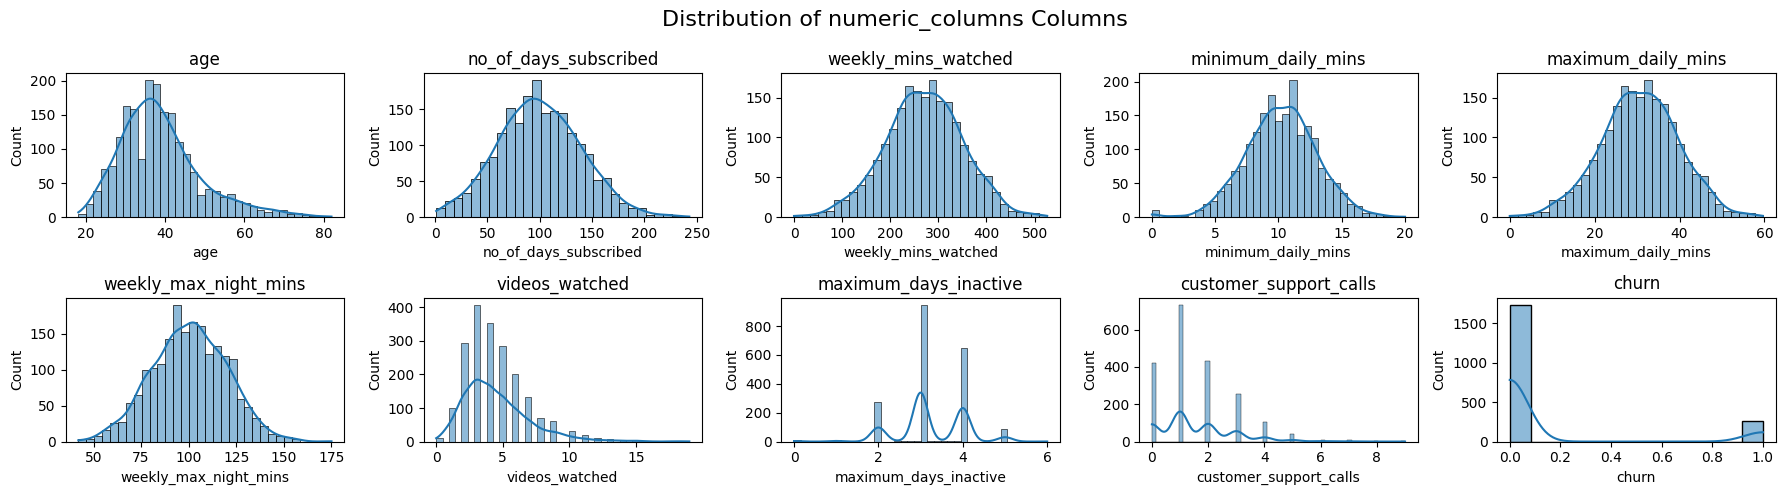

In [15]:
plt.figure(figsize=[18, 5])
plt.suptitle('Distribution of numeric_columns Columns', fontsize=16)

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 5, i)
    sns.histplot(df[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()


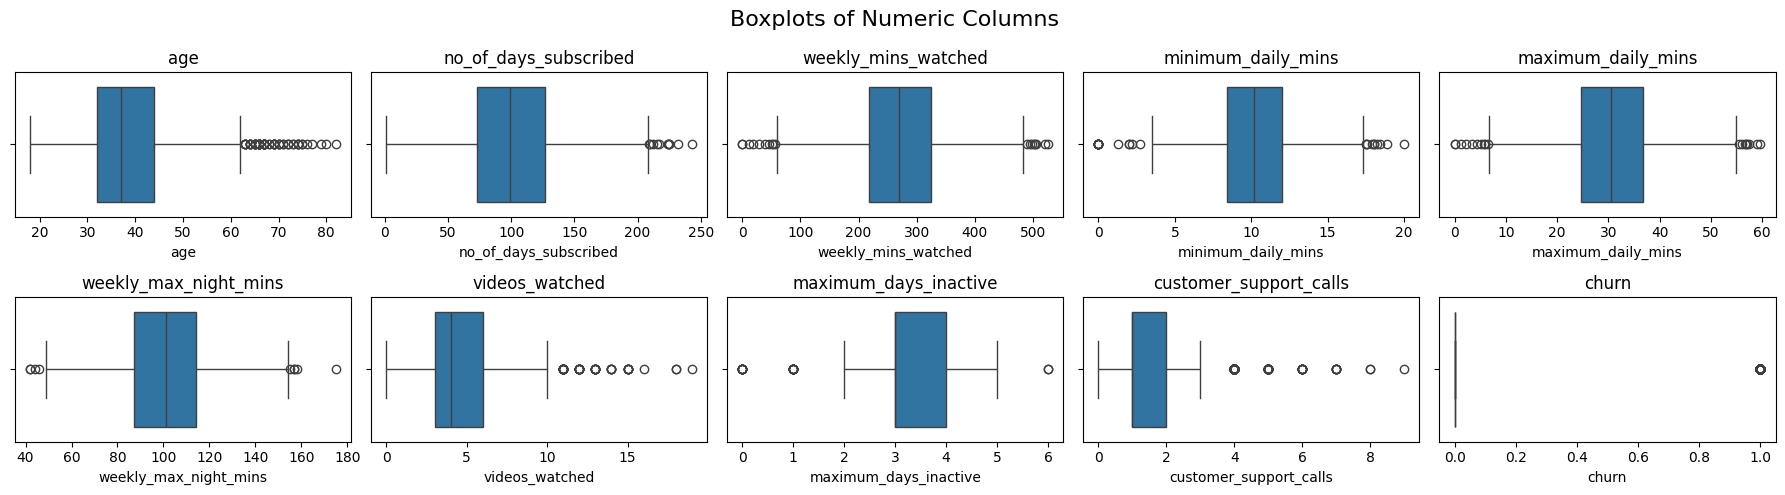

In [16]:
plt.figure(figsize=[18, 5])
plt.suptitle('Boxplots of Numeric Columns', fontsize=16)

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(x=df[column], data=df)
    plt.title(column)

plt.tight_layout()
plt.show()


In [17]:
def extract_whiskers(data, whisker=1.5):
    median_value = np.median(data) # Medyan
    upper_quartile = np.percentile(data, 75) # 75%
    lower_quartile = np.percentile(data, 25) # 25% 

    iqr = upper_quartile - lower_quartile # Interquartile Range
    
    upper_whisker = data[data<=upper_quartile+whisker*iqr].max() # Maksimum Kabul Edilen Değer
    lower_whisker = data[data>=lower_quartile-whisker*iqr].min() # Minimum Kabul Edilen Değer
    
    print("Upper Whisker:", upper_whisker)
    print("Lower Whisker:", lower_whisker)

    return lower_whisker,upper_whisker

In [18]:
df.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [19]:
df.shape

(2000, 13)

In [20]:
numeric_columns2 = ['age', 'no_of_days_subscribed', 'weekly_mins_watched',
                   'minimum_daily_mins', 'maximum_daily_mins', 'weekly_max_night_mins', 'maximum_days_inactive',]
for col in numeric_columns2:

    print("-------------- " + col +"------------")
    lower_whisker,upper_whisker=extract_whiskers(df[col],whisker=1.8)
    df = df.loc[df[col] <= upper_whisker]
    df = df.loc[df[col] >= lower_whisker]




-------------- age------------
Upper Whisker: 65
Lower Whisker: 18
-------------- no_of_days_subscribed------------
Upper Whisker: 217
Lower Whisker: 1
-------------- weekly_mins_watched------------
Upper Whisker: 506.1
Lower Whisker: 29.25
-------------- minimum_daily_mins------------
Upper Whisker: 18.4
Lower Whisker: 2.0
-------------- maximum_daily_mins------------
Upper Whisker: 57.36
Lower Whisker: 3.32
-------------- weekly_max_night_mins------------
Upper Whisker: 158
Lower Whisker: 42
-------------- maximum_days_inactive------------
Upper Whisker: 5.0
Lower Whisker: 2.0


In [21]:
df.shape

(1916, 13)

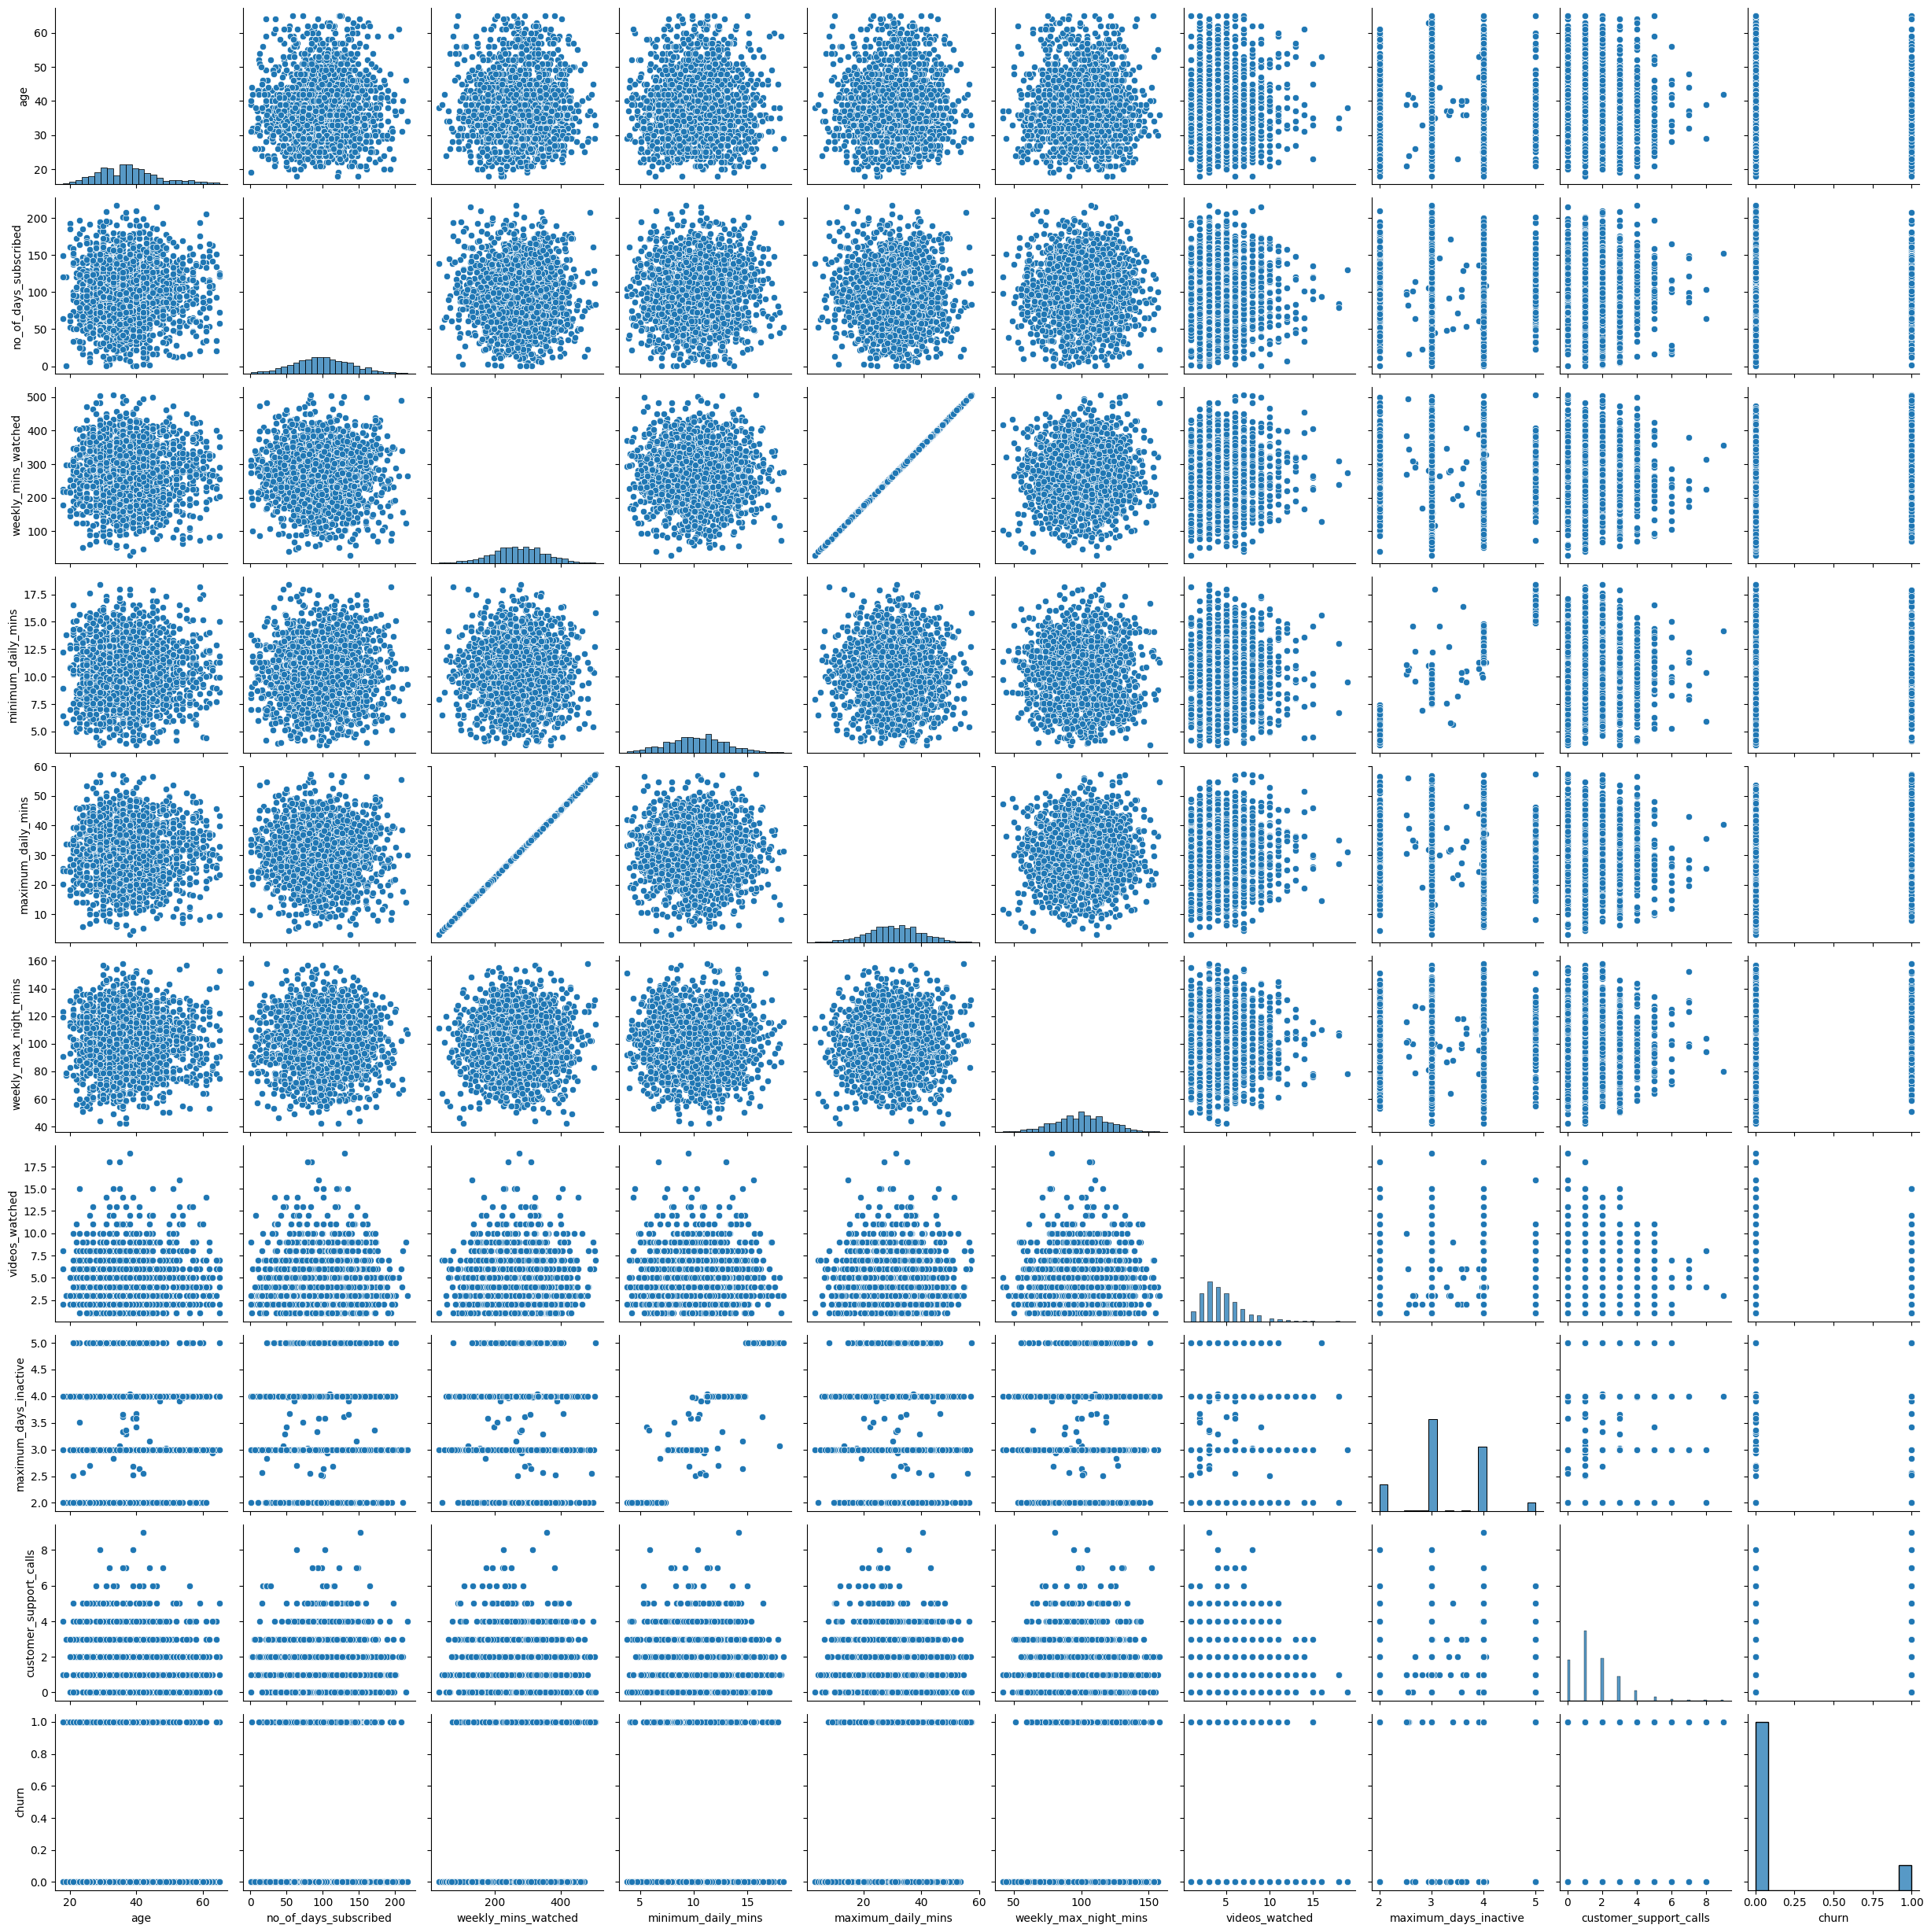

In [22]:
sns.pairplot(df);

## Correlation Matrix

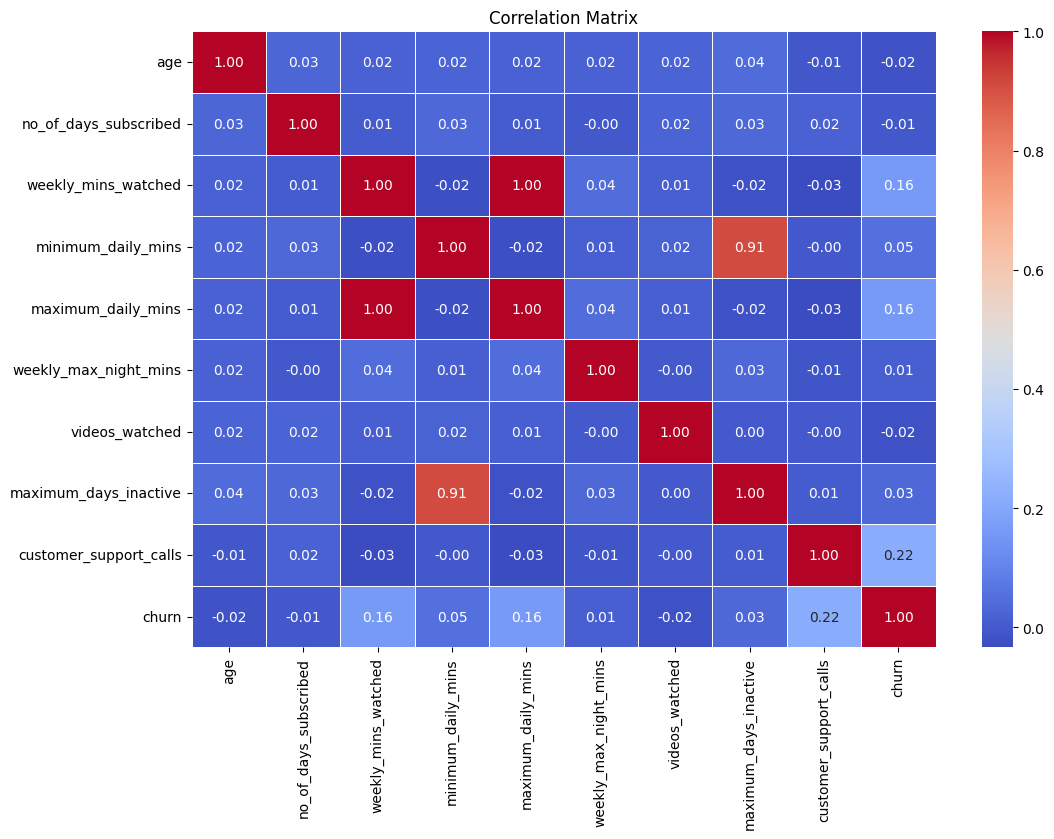

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Görüldüğü gibi 'maximum_days_inactive' ve 'minimum_daily_mins'  arasında %91 gibi çok yüksek bir korelasyon var o yüzde 2 sinde birini droplamamız gerekir , aynı şekilde weekly_mins_watched ile maximum_daily mins arasında korelasyon %100 bunulardan birinide droplamamız gerekir.

In [24]:
high_corr=["maximum_days_inactive","maximum_daily_mins"]
df.drop(high_corr, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1916 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  1916 non-null   object 
 1   age                     1916 non-null   int64  
 2   no_of_days_subscribed   1916 non-null   int64  
 3   multi_screen            1916 non-null   object 
 4   mail_subscribed         1916 non-null   object 
 5   weekly_mins_watched     1916 non-null   float64
 6   minimum_daily_mins      1916 non-null   float64
 7   weekly_max_night_mins   1916 non-null   int64  
 8   videos_watched          1916 non-null   int64  
 9   customer_support_calls  1916 non-null   int64  
 10  churn                   1916 non-null   float64
dtypes: float64(3), int64(5), object(3)
memory usage: 244.2+ KB


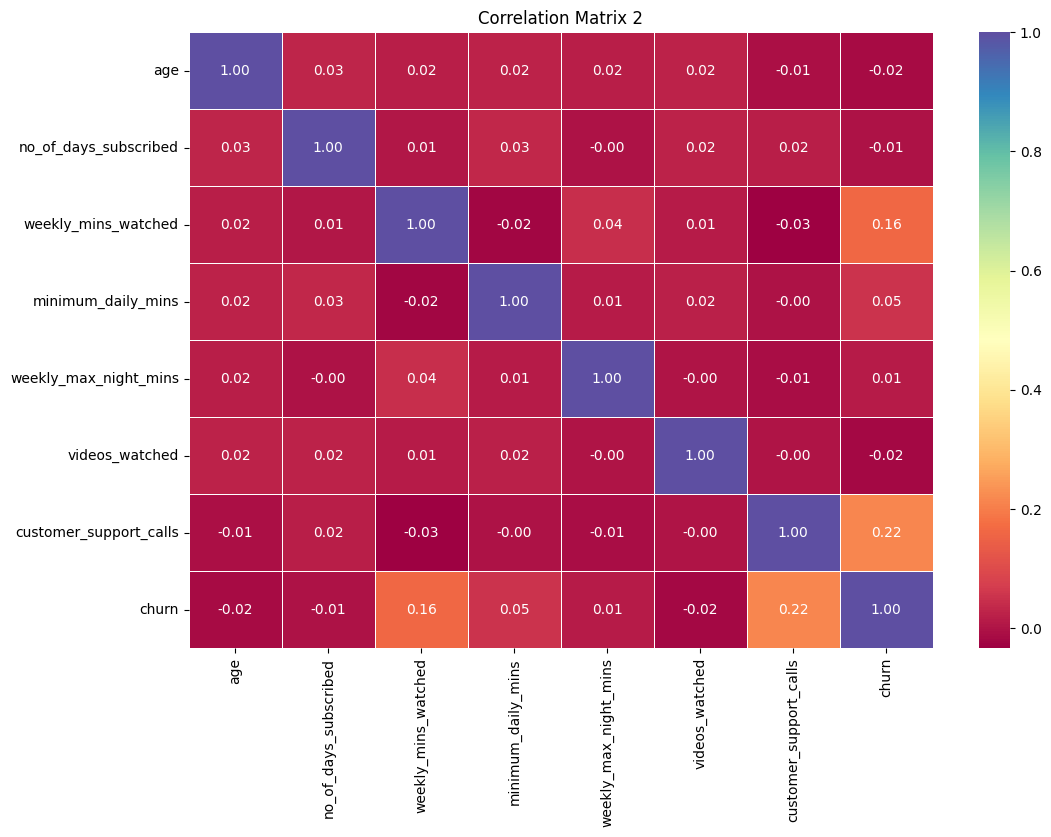

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='Spectral', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix 2')
plt.show()

## Numerical-Categorical Encoding

In [26]:
categoric_columns.columns

Index(['gender', 'multi_screen', 'mail_subscribed'], dtype='object')

In [27]:
for col in categoric_columns.columns:
    print("----------"+col+"-----------")
    print(df[col].unique())

----------gender-----------
['Female' 'Male']
----------multi_screen-----------
['no' 'yes']
----------mail_subscribed-----------
['no' 'yes']


In [28]:
#gender
for col in df.columns:
    df[col]=df[col].replace("Female",0)
    df[col]=df[col].replace("Male",1)

In [29]:
#multi_screen
df['multi_screen'] = df['multi_screen'].apply(lambda x: str(x).replace('no', "0"))
df['multi_screen'] = df['multi_screen'].apply(lambda x: str(x).replace('yes', "1"))
df['multi_screen'] = df['multi_screen'].astype(int)

In [30]:
#mail_subscribed
df["mail_subscribed"]=df.mail_subscribed.map({"no":0,"yes":1})

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1916 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  1916 non-null   int64  
 1   age                     1916 non-null   int64  
 2   no_of_days_subscribed   1916 non-null   int64  
 3   multi_screen            1916 non-null   int32  
 4   mail_subscribed         1916 non-null   int64  
 5   weekly_mins_watched     1916 non-null   float64
 6   minimum_daily_mins      1916 non-null   float64
 7   weekly_max_night_mins   1916 non-null   int64  
 8   videos_watched          1916 non-null   int64  
 9   customer_support_calls  1916 non-null   int64  
 10  churn                   1916 non-null   float64
dtypes: float64(3), int32(1), int64(7)
memory usage: 236.7 KB


In [32]:
df.head(10)

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls,churn
0,0,36,62,0,0,148.35,12.2,82,1,1,0.0
1,0,39,149,0,0,294.45,7.7,87,3,2,0.0
2,0,65,126,0,0,87.30,11.9,91,1,5,1.0
3,0,24,131,0,1,321.30,9.5,102,4,3,0.0
4,0,40,191,0,0,243.00,10.9,83,7,1,0.0
5,1,31,65,0,0,193.65,12.7,111,6,4,1.0
6,1,54,59,0,0,239.25,10.2,106,4,0,0.0
7,0,40,50,0,0,196.65,5.6,88,9,5,1.0
8,1,61,205,0,1,263.70,7.8,64,5,2,0.0
9,1,31,63,0,0,316.80,12.3,58,2,0,0.0


In [33]:
# Veri çerçevesini CSV dosyasına kaydet
#df.to_csv('../input/df_encoded.csv', index=False)


## Dependent-Independent

In [34]:
y=df["churn"]
X=df.drop("churn",axis=1)

In [35]:
X.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls
0,0,36,62,0,0,148.35,12.2,82,1,1
1,0,39,149,0,0,294.45,7.7,87,3,2
2,0,65,126,0,0,87.30,11.9,91,1,5
3,0,24,131,0,1,321.30,9.5,102,4,3
4,0,40,191,0,0,243.00,10.9,83,7,1


In [36]:
y.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: churn, dtype: float64

# Train-train-test-validation

#### 80-60-20-20
#### Train=train+val=60+20=80


In [37]:
print("X_train:", X.shape)
print("y_train:", y.shape)

X_train: (1916, 10)
y_train: (1916,)


In [38]:
# Train-test    80-20
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
print("X_train:", X_train.shape)
print("x_test:", x_test.shape)
print("Y_train:", Y_train.shape)
print("y_test:", y_test.shape)

X_train: (1532, 10)
x_test: (384, 10)
Y_train: (1532,)
y_test: (384,)


In [40]:
# train-val    60-20
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

In [41]:
print("x_train:", x_train.shape)
print("x_val:", x_val.shape)
print("y_train:", y_train.shape)
print("y_val:", y_val.shape)

x_train: (1149, 10)
x_val: (383, 10)
y_train: (1149,)
y_val: (383,)


Modelimizi böldük öncelikle bu  <<<x_train, x_val, y_train, y_val>>> verilerle elimizdeki classifierların performansını ölçeceğiz en iyi hangisiyse onunla devam edeceğiz.sonrasında cross validation uygulayacağız.

## Model trainin with datas %60 after that Model Tes with validation dataset

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier


classifiers = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Trees": DecisionTreeClassifier(),
    "Neural Networks": MLPClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(),
}

acc_list=[]
precision_list=[]
recall_list=[]
f1score_list=[]
name_list=[]
cm_list=[]

for name, model in classifiers.items():
    model.fit(x_train, y_train)
    y_val_pred = model.predict(x_val)
    
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)
    cm = confusion_matrix(y_val, y_val_pred)

    acc_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1score_list.append(f1)
    name_list.append(name)
    cm_list.append(cm)

    print(f"{name}: Accuracy = {accuracy:.2f}, Precision = {precision:.2f}, Recall = {recall:.2f}, F1 Score = {f1:.2f}")

results= {
        "Model": name_list,
        "Accuracy": acc_list,
        "Precision": precision_list,
        "Recall": recall_list,
        "F1 Score": f1score_list
            }
metric_df=pd.DataFrame(results)
metric_df

SVM: Accuracy = 0.88, Precision = 0.00, Recall = 0.00, F1 Score = 0.00
Random Forest: Accuracy = 0.92, Precision = 0.74, Recall = 0.51, F1 Score = 0.61
Gradient Boosting: Accuracy = 0.93, Precision = 0.82, Recall = 0.51, F1 Score = 0.63
KNN: Accuracy = 0.88, Precision = 0.43, Recall = 0.07, F1 Score = 0.12
Logistic Regression: Accuracy = 0.89, Precision = 0.67, Recall = 0.04, F1 Score = 0.08
Naive Bayes: Accuracy = 0.85, Precision = 0.37, Recall = 0.42, F1 Score = 0.39
Decision Trees: Accuracy = 0.86, Precision = 0.44, Recall = 0.58, F1 Score = 0.50


Neural Networks: Accuracy = 0.87, Precision = 0.41, Recall = 0.20, F1 Score = 0.27
AdaBoost: Accuracy = 0.90, Precision = 0.62, Recall = 0.29, F1 Score = 0.39
XGBoost: Accuracy = 0.94, Precision = 0.85, Recall = 0.62, F1 Score = 0.72


,Model,Accuracy,Precision,Recall,F1 Score
0,SVM,0.882507,0.000000,0.000000,0.000000
1,Random Forest,0.921671,0.741935,0.511111,0.605263
2,Gradient Boosting,0.929504,0.821429,0.511111,0.630137
3,KNN,0.879896,0.428571,0.066667,0.115385
4,Logistic Regression,0.885117,0.666667,0.044444,0.083333
5,Naive Bayes,0.845953,0.365385,0.422222,0.391753
6,Decision Trees,0.864230,0.440678,0.577778,0.500000
7,Neural Networks,0.872063,0.409091,0.200000,0.268657
8,AdaBoost,0.895561,0.619048,0.288889,0.393939
9,XGBoost,0.942559,0.848485,0.622222,0.717949


In [43]:
# knn=classifiers["KNN"]
# knn.fit(x_train, y_train)
# y_val_pred = model.predict(x_val)  
# accuracy1 = accuracy_score(y_val, y_val_pred)
# accuracy1

# import joblib

# # Modeli kaydet
# joblib.dump(knn, 'knn_model.pkl')

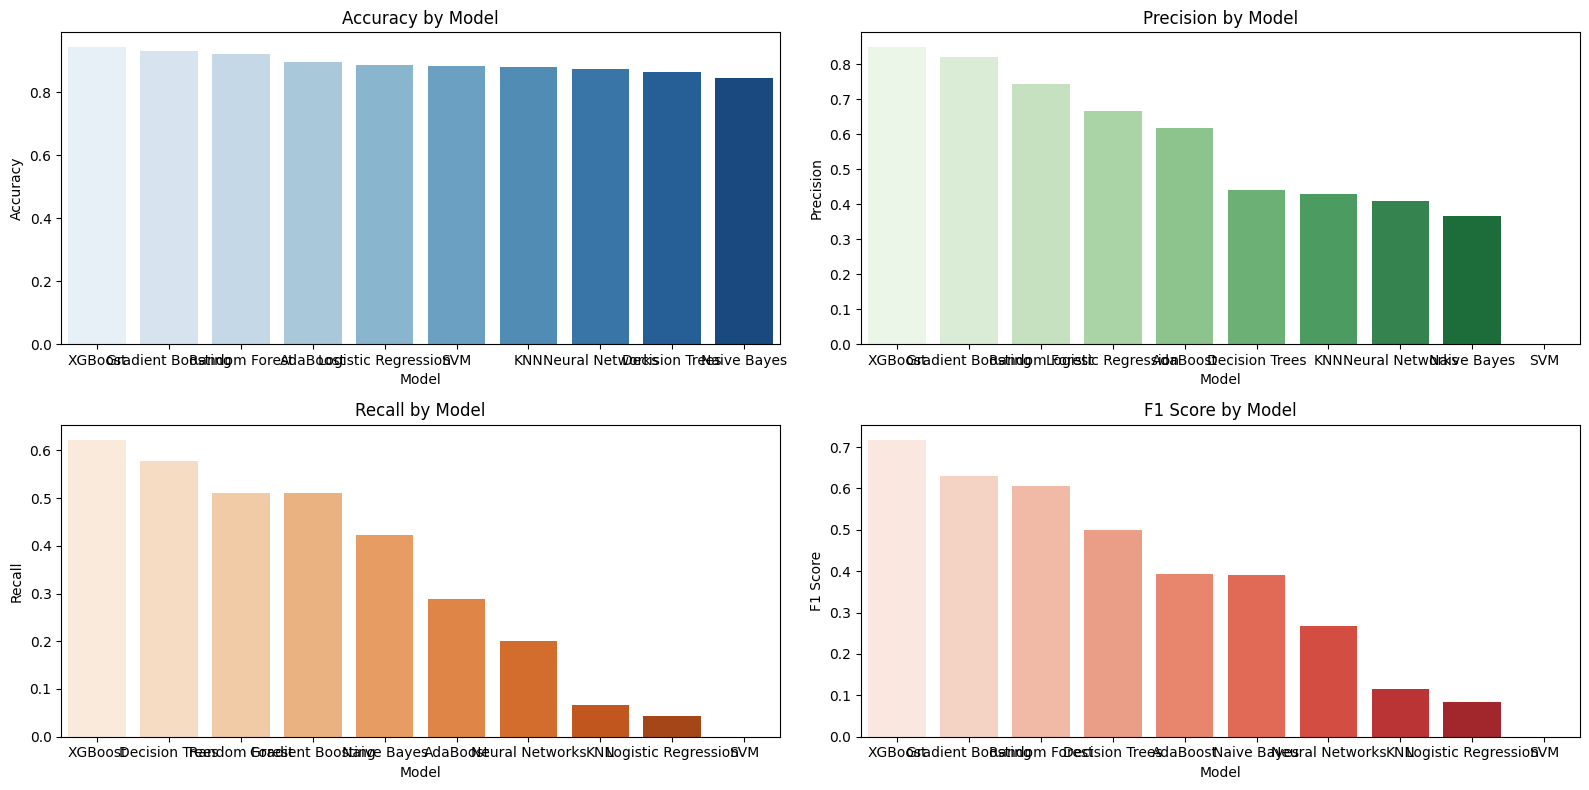

In [44]:
# Görselleştirme
plt.figure(figsize=(16, 8))

# Accuracy
df_combined = metric_df.sort_values(by='Accuracy', ascending=False)
plt.subplot(2, 2, 1)
sns.barplot(data=df_combined, x='Model', y='Accuracy', palette='Blues')
plt.title('Accuracy by Model')

# Precision
df_combined = metric_df.sort_values(by='Precision', ascending=False)
plt.subplot(2, 2, 2)
sns.barplot(data=df_combined, x='Model', y='Precision', palette='Greens')
plt.title('Precision by Model')

# Recall
df_combined = metric_df.sort_values(by='Recall', ascending=False)
plt.subplot(2, 2, 3)
sns.barplot(data=df_combined, x='Model', y='Recall', palette='Oranges')
plt.title('Recall by Model')

# F1 Score
df_combined = metric_df.sort_values(by='F1 Score', ascending=False)
plt.subplot(2, 2, 4)
sns.barplot(data=df_combined, x='Model', y='F1 Score', palette='Reds')
plt.title('F1 Score by Model')

plt.tight_layout()
plt.show()


## Scaling-Standardization
Şimdi scaling işlemini uygulayalım bakalım sonuçlar ne olacak !

In [45]:
from sklearn.preprocessing import StandardScaler

# StandardScaler nesnesini oluştur
scaler = StandardScaler()
# Eğitim verilerine fit ve transform uygula
x_train_scaled = scaler.fit_transform(x_train)
# Doğrulama (validation) verilerine transform uygula (fit etme, sadece eğitim verilerine yapılır)
x_val_scaled = scaler.transform(x_val)


## Model Training

In [46]:
acc_list_scaled=[]
precision_list_scaled=[]
recall_list_scaled=[]
f1score_list_scaled=[]
name_list_scaled=[]

for name, model in classifiers.items():
    model.fit(x_train_scaled, y_train)
    y_val_pred = model.predict(x_val_scaled)
    
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    acc_list_scaled.append(accuracy)
    precision_list_scaled.append(precision)
    recall_list_scaled.append(recall)
    f1score_list_scaled.append(f1)
    name_list_scaled.append(name)

    print(f"{name}: Accuracy = {accuracy:.2f}, Precision = {precision:.2f}, Recall = {recall:.2f}, F1 Score = {f1:.2f}")

results2= {
        "Model": name_list_scaled,
        "Accuracy": acc_list_scaled,
        "Precision": precision_list_scaled,
        "Recall": recall_list_scaled,
        "F1 Score": f1score_list_scaled
            }
metric_df2=pd.DataFrame(results2)
metric_df2

SVM: Accuracy = 0.90, Precision = 0.78, Recall = 0.16, F1 Score = 0.26
Random Forest: Accuracy = 0.93, Precision = 0.76, Recall = 0.56, F1 Score = 0.64
Gradient Boosting: Accuracy = 0.93, Precision = 0.82, Recall = 0.51, F1 Score = 0.63
KNN: Accuracy = 0.88, Precision = 0.50, Recall = 0.13, F1 Score = 0.21
Logistic Regression: Accuracy = 0.88, Precision = 0.50, Recall = 0.11, F1 Score = 0.18
Naive Bayes: Accuracy = 0.85, Precision = 0.37, Recall = 0.42, F1 Score = 0.39
Decision Trees: Accuracy = 0.87, Precision = 0.45, Recall = 0.56, F1 Score = 0.50
Neural Networks: Accuracy = 0.90, Precision = 0.59, Recall = 0.49, F1 Score = 0.54
AdaBoost: Accuracy = 0.90, Precision = 0.62, Recall = 0.29, F1 Score = 0.39
XGBoost: Accuracy = 0.94, Precision = 0.85, Recall = 0.62, F1 Score = 0.72


,Model,Accuracy,Precision,Recall,F1 Score
0,SVM,0.895561,0.777778,0.155556,0.259259
1,Random Forest,0.926893,0.757576,0.555556,0.641026
2,Gradient Boosting,0.929504,0.821429,0.511111,0.630137
3,KNN,0.882507,0.500000,0.133333,0.210526
4,Logistic Regression,0.882507,0.500000,0.111111,0.181818
5,Naive Bayes,0.845953,0.365385,0.422222,0.391753
6,Decision Trees,0.866841,0.446429,0.555556,0.495050
7,Neural Networks,0.900783,0.594595,0.488889,0.536585
8,AdaBoost,0.895561,0.619048,0.288889,0.393939
9,XGBoost,0.942559,0.848485,0.622222,0.717949


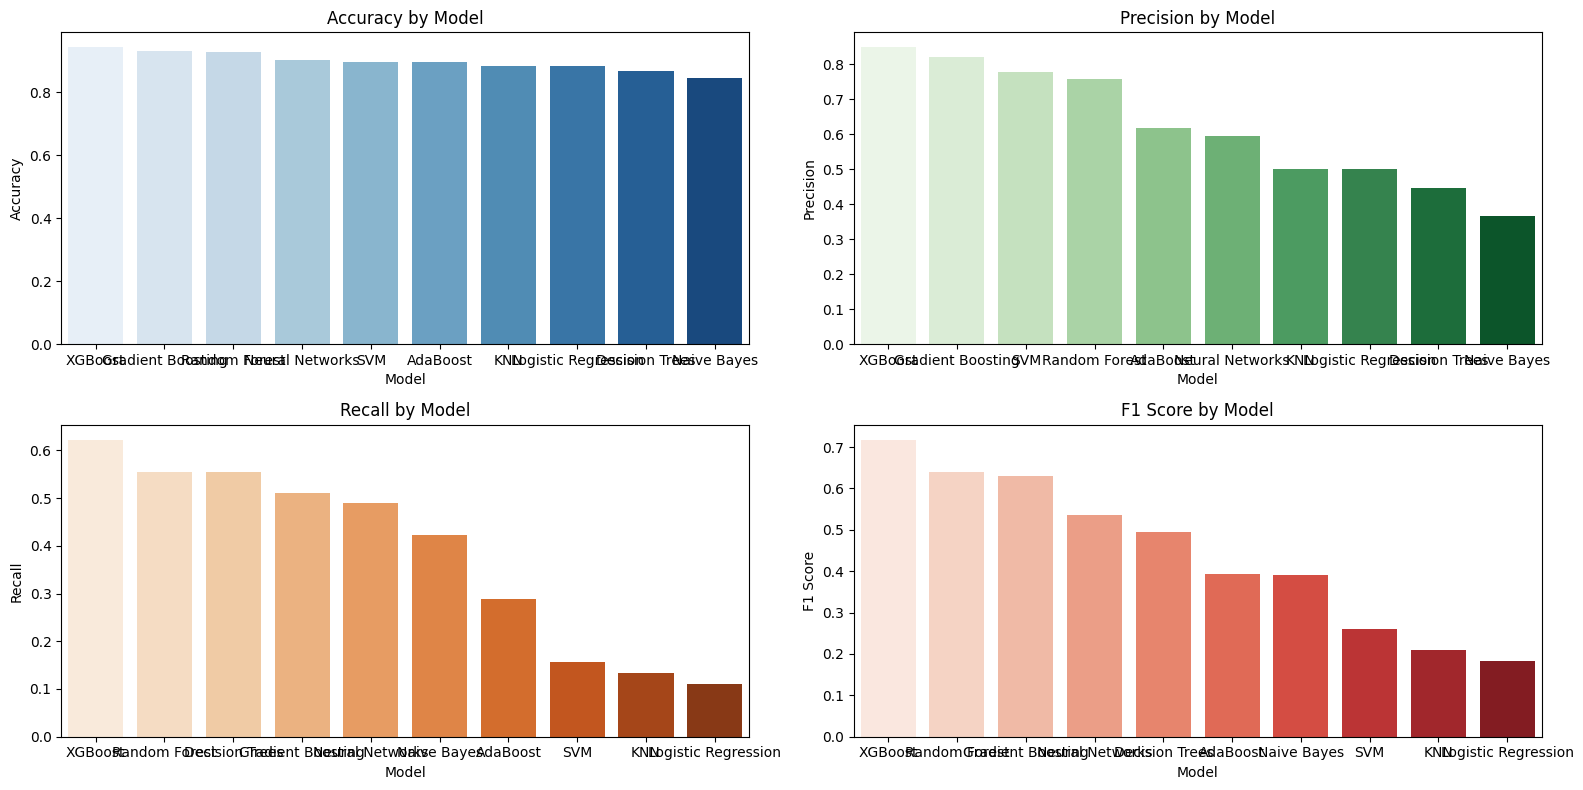

In [47]:
# Görselleştirme
plt.figure(figsize=(16, 8))

# Accuracy
df_combined = metric_df2.sort_values(by='Accuracy', ascending=False)
plt.subplot(2, 2, 1)
sns.barplot(data=df_combined, x='Model', y='Accuracy', palette='Blues')
plt.title('Accuracy by Model')

# Precision
df_combined = metric_df2.sort_values(by='Precision', ascending=False)
plt.subplot(2, 2, 2)
sns.barplot(data=df_combined, x='Model', y='Precision', palette='Greens')
plt.title('Precision by Model')

# Recall
df_combined = metric_df2.sort_values(by='Recall', ascending=False)
plt.subplot(2, 2, 3)
sns.barplot(data=df_combined, x='Model', y='Recall', palette='Oranges')
plt.title('Recall by Model')

# F1 Score
df_combined = metric_df2.sort_values(by='F1 Score', ascending=False)
plt.subplot(2, 2, 4)
sns.barplot(data=df_combined, x='Model', y='F1 Score', palette='Reds')
plt.title('F1 Score by Model')

plt.tight_layout()
plt.show()

En iyi model olarak Xgboost görünüyor bu yüzden yolumuza Xgboost ile devam ediyoruz.

## Cross Validation

In [48]:
X_scaled = scaler.fit_transform(X)

# XGBoost modelinin oluşturulması
model = classifiers["XGBoost"]

# Cross-validation için StratifiedKFold kullanımı
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scorings=["accuracy","precision","recall","f1"]

for scoring in scorings:

    print("---------------"+scoring+"---------------")
    # Cross-validation işlemi
    scores = cross_val_score(model, X_scaled, y, cv=cv, scoring=scoring)
    # Cross-validation sonuçlarını ekrana yazdırma
    print("Cross-Validation Scores:", scores)
    print("Ortalama Score:", scores.mean())


---------------accuracy---------------
Cross-Validation Scores: [0.93229167 0.92167102 0.90078329 0.92167102 0.91906005]
Ortalama Score: 0.919095409051349
---------------precision---------------
Cross-Validation Scores: [0.81081081 0.75       0.68965517 0.75675676 0.725     ]
Ortalama Score: 0.7464445479962722
---------------recall---------------
Cross-Validation Scores: [0.6122449  0.5625     0.40816327 0.57142857 0.59183673]
Ortalama Score: 0.549234693877551
---------------f1---------------
Cross-Validation Scores: [0.69767442 0.64285714 0.51282051 0.65116279 0.65168539]
Ortalama Score: 0.6312400516476816


## Train choosed Best Algorithm Xgboost  Train-test 80-20

In [49]:
#X_train, x_test, Y_train, y_test 
X_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.fit_transform(x_test)

In [50]:
xgb=XGBClassifier()
xgb.fit(X_train_scaled,Y_train)
y_prediction=xgb.predict(x_test_scaled)

In [51]:
accuracy = accuracy_score(y_test, y_prediction)
precision = precision_score(y_test, y_prediction)
recall = recall_score(y_test, y_prediction)
f1 = f1_score(y_test, y_prediction)

In [52]:
score_df = pd.DataFrame({
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}, index=["XGBoost"])

score_df

,Accuracy,Precision,Recall,F1 Score
XGBoost,0.885417,0.72,0.327273,0.45


## Hyperparameteer Optimization

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# param_grid = {
#     'learning_rate': [0.01, 0.1, 0.2, 0.3],
#     'n_estimators': [50, 100, 200, 300, 500],
#     'max_depth': [3, 5, 7, 9],
#     'min_child_weight': [1, 3, 5, 7],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0],
#     'gamma': [0, 0.1, 0.2, 0.3],
#     'reg_alpha': [0, 0.1, 0.2, 0.3],
#     'reg_lambda': [1, 1.5, 2, 3]
# }

xgb_model = XGBClassifier(objective='binary:logistic', random_state=42)

f1_scorer = make_scorer(f1_score)
accuracy_scorer = make_scorer(accuracy_score)
precision_scorer = make_scorer(precision_score)
recall_scorer = make_scorer(recall_score)

scorers=[f1_scorer,accuracy_scorer,precision_scorer,recall_scorer]

# for scorer in scorers:
#     grid_search = GridSearchCV(
#         estimator=xgb_model,
#         param_grid=param_grid,
#         scoring=scorer,#scoring="accuracy"
#         cv=5,
#         verbose=2,
#         n_jobs=-1
#         )


#     grid_search.fit(X_train, Y_train)

#     print("-----------------------")
#     print("Best Parameters: ", grid_search.best_params_)
#     print("Best Score: {:.4f}".format(grid_search.best_score_))


grid_search = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid,
        scoring=accuracy_scorer,#scoring="accuracy"
        cv=5,
        verbose=2,
        n_jobs=-1
        )


grid_search.fit(X_train, Y_train)

print("-----------------------")
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: {:.4f}".format(grid_search.best_score_))




Fitting 5 folds for each of 243 candidates, totalling 1215 fits


-----------------------
Best Parameters:  {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 50, 'subsample': 1.0}
Best Score: 0.9223


In [54]:
# Get the best model from the grid search
best_xgb_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_xgb_model.predict(x_test)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm=confusion_matrix(y_test, y_pred)

print("Final Evaluation on Test Set:")
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))


Final Evaluation on Test Set:
Accuracy: 0.9297
Precision: 0.8889
Recall: 0.5818
F1 Score: 0.7033


In [55]:
best_xgb_model = grid_search.best_estimator_


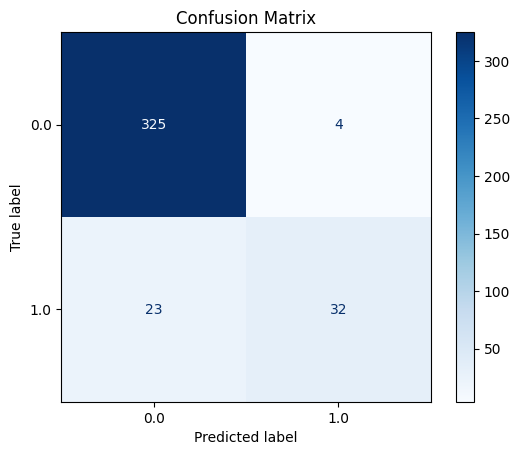

In [56]:
from sklearn.metrics import plot_confusion_matrix
# En iyi XGBoost modelinizin confusion matrix'ini oluşturun
plot_confusion_matrix(best_xgb_model, x_test, y_test, cmap=plt.cm.Blues, values_format=".0f")
plt.title('Confusion Matrix')
plt.show()


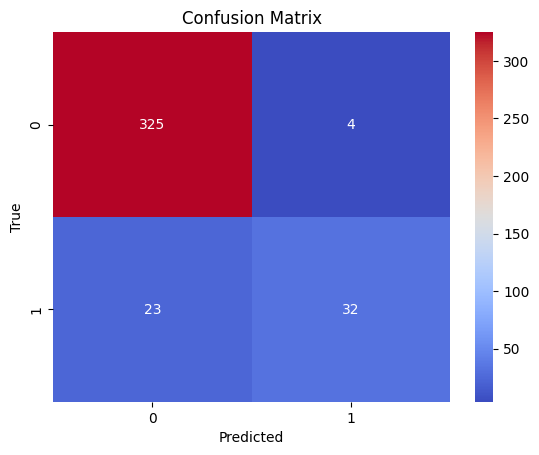

In [57]:
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Model save and load

In [61]:
import joblib

# Modeli kaydet
joblib.dump(best_xgb_model, 'best_xgb_model.pkl')


['best_xgb_model.pkl']

In [66]:
# Modeli içe aktar
loaded_model = joblib.load('C:/Users/cinar/Desktop/1.Ai-Projects/code/best_xgb_model.pkl')


In [ ]:
loaded_model

In [ ]:
# Evaluate the best model on the test set
y_pred = loaded_model.predict(x_test)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Final Evaluation on Test Set:")
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))


## Feature Importance   ## Explainable Ai Shap


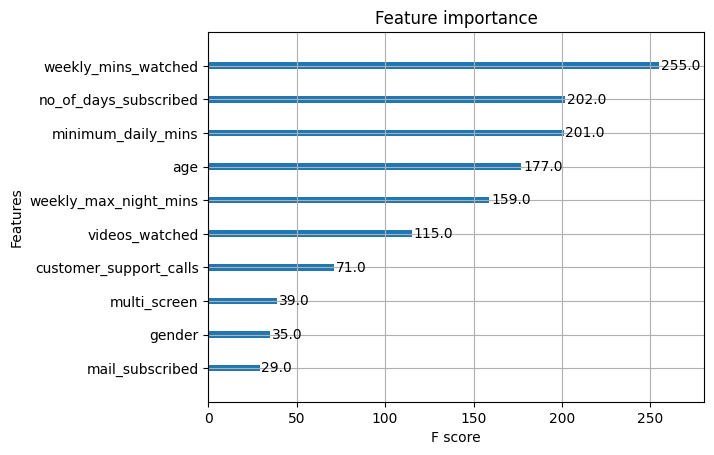

In [62]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# 'best_xgb_model' is your trained XGBoost model
plot_importance(best_xgb_model, importance_type='weight')
plt.show()


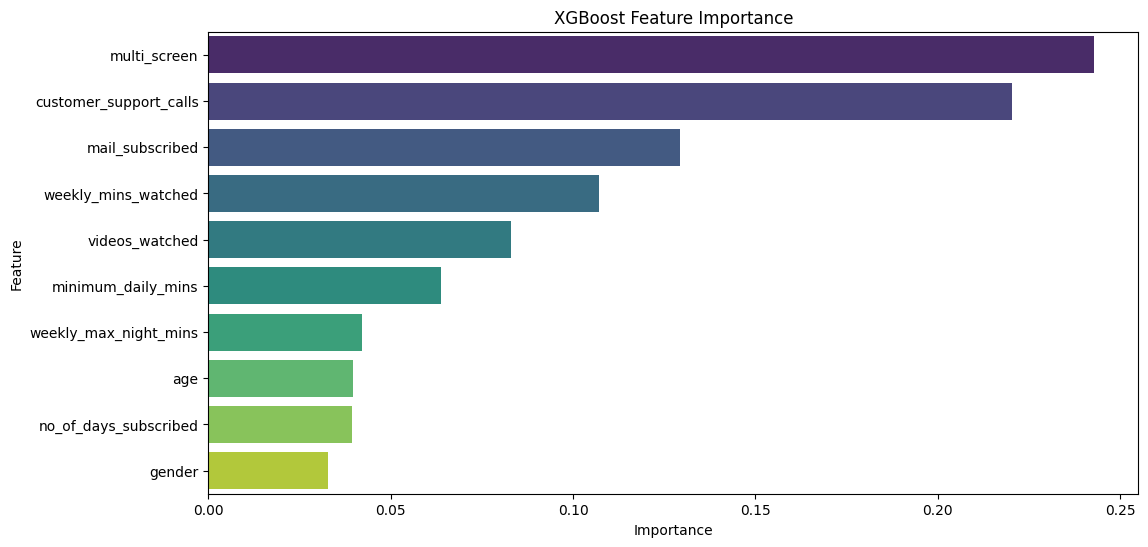

In [63]:
# 'best_xgb_model' is your trained XGBoost model
feature_importance = best_xgb_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('XGBoost Feature Importance')
plt.show()


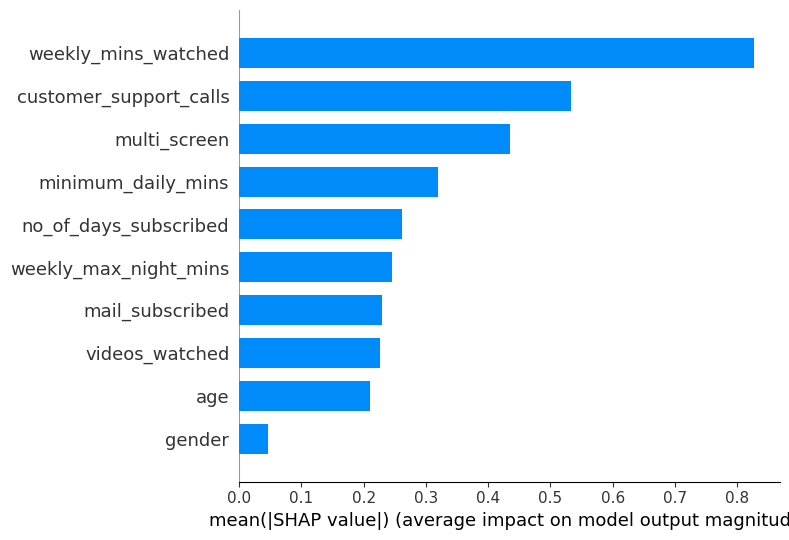

In [64]:
import shap

explainer = shap.Explainer(best_xgb_model)

# Calculate SHAP values for a set of samples (X_val, for example)
shap_values = explainer.shap_values(x_test)

# Summary plot
shap.summary_plot(shap_values, x_test, plot_type="bar")


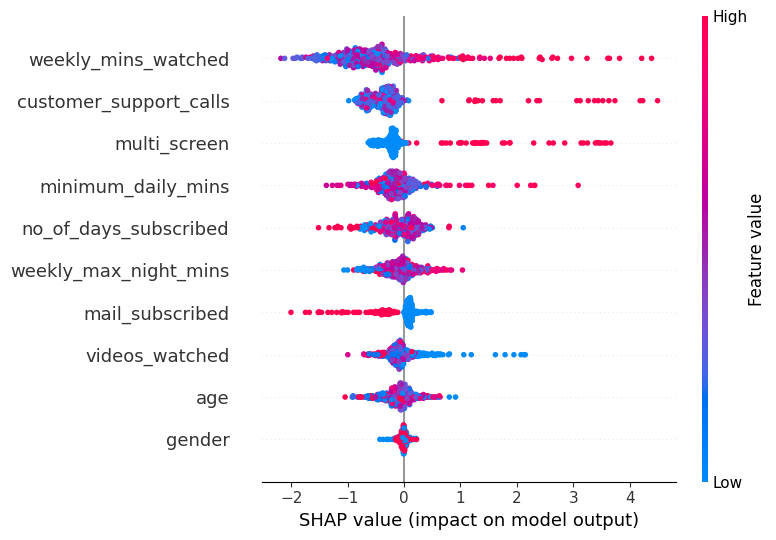

In [65]:
# SHAP summary plot
shap.summary_plot(shap_values, x_test)
